1、线性回归

(1) 生成训练数据，数据为带有服从-0.5 到 0.5 的均匀分布噪声的正弦函数，画出这 100 个样本的散点图。（提交散点图）

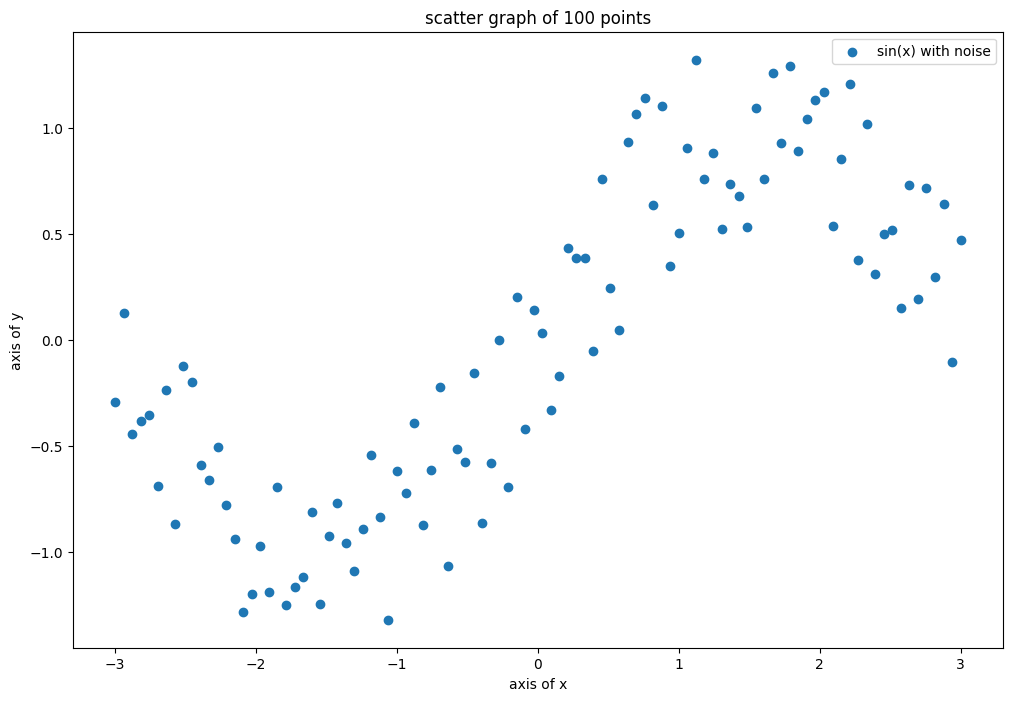

In [1]:
import numpy as np
import matplotlib.pyplot as plt
num_observations=100
train_x=np.linspace(-3,3,num_observations)
train_y=np.sin(train_x)+np.random.uniform(-0.5,0.5,num_observations)
plt.figure(figsize=(12,8))
plt.scatter(train_x,train_y,label='sin(x) with noise')
plt.xlabel("axis of x")
plt.ylabel("axis of y")
plt.title("scatter graph of 100 points")
plt.legend()
plt.show()

(2) 使用pytorch实现线性回归模型，训练参数𝑤和𝑏。

nn.Module属性和方法：
1.parameters()：返回模型的所有可训练参数（权重和偏置），用于优化器。
2.cuda()：将模型转移到 GPU 进行计算。
3.state_dict()：返回模型的所有参数（包括权重和偏置）及其对应的值，常用于保存和加载模型。
4.load_state_dict()：加载一个存储的模型参数字典。
5.train()：将模型设置为训练模式（默认状态）。这会影响某些层（如 Dropout 和 BatchNorm）的行为。
6.eval()：将模型设置为评估模式，用于测试时，固定某些层的行为。
7.forward()：前向传播的定义，用户需要在模型中重写此方法，定义模型的前向计算逻辑。

主要解决流程：
1.自定义模型类（初始化+定义前向传播过程）
2.确定损失函数
3.确定优化器
4.for循环（迭代次数）
5.前向传播: model(x_now)
6.计算损失
7.计算梯度: loss.backward()
8.反向传播：optimizer.step()

In [2]:
import torch
from torch import nn, optim
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        bias = torch.tensor([1]).cuda()
        x = x.unsqueeze(0)
        x = torch.stack((x,bias),dim=1)
        x = x.reshape((1,2))
        output = self.fc1(x)
        return output

model = LinearModel().cuda()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6)
max_epoch=200
epoch_loss=[] #每一次迭代之后的损失值
weights_and_bias=[]

for epoch in range(max_epoch):
    optimizer.zero_grad()
    for x,y in zip(train_x,train_y):
        x, y = torch.tensor(x).float().cuda(), torch.tensor(y).float().cuda()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    w=model.fc1.weight.clone().detach().cpu().numpy()  #使用detach分离梯度追踪
    b=model.fc1.bias.clone().detach().cpu().numpy()
    #b是偏置项，用于调整模型输出。
    weights_and_bias.append(w)
    epoch_loss.append(loss.item())
print(np.array(weights_and_bias).shape)

/home/cs/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


(200, 1, 2)


(3) 输出参数𝑤、𝑏和损失。（提交运行结果）

将（2）训练过程中的w,b和损失保存在列表中，将其打印

In [3]:
iter=len(epoch_loss)
for i in range(iter):
    print(f"第{i+1}次迭代  参数w为:{weights_and_bias[i][0][0]}  参数b为:{weights_and_bias[i][0][1]}  loss为:{epoch_loss[i]}")
    

第1次迭代  参数w为:-0.3430972695350647  参数b为:-0.678205668926239  loss为:2.6101813316345215
第2次迭代  参数w为:-0.32337868213653564  参数b为:-0.6840282082557678  loss为:2.4588205814361572
第3次迭代  参数w为:-0.30438506603240967  参数b为:-0.6895354390144348  loss为:2.3166823387145996
第4次迭代  参数w为:-0.2860875725746155  参数b为:-0.6947400569915771  loss为:2.183159112930298
第5次迭代  参数w为:-0.26845866441726685  参数b为:-0.6996561884880066  loss为:2.0576984882354736
第6次迭代  参数w为:-0.25147172808647156  参数b为:-0.7042956352233887  loss为:1.9397755861282349
第7次迭代  参数w为:-0.235101580619812  参数b为:-0.7086706161499023  loss为:1.8289059400558472
第8次迭代  参数w为:-0.21932393312454224  参数b为:-0.7127928137779236  loss为:1.7246407270431519
第9次迭代  参数w为:-0.20411546528339386  参数b为:-0.7166731357574463  loss为:1.6265573501586914
第10次迭代  参数w为:-0.18945367634296417  参数b为:-0.7203222513198853  loss为:1.5342634916305542
第11次迭代  参数w为:-0.1753171980381012  参数b为:-0.7237507104873657  loss为:1.4473965167999268
第12次迭代  参数w为:-0.16168524324893951  参数b为:-0.7269676327705383  loss为:1.3

(4) 画出预测回归曲线以及训练数据散点图，对比回归曲线和散点图并分析原因。

主要思路是将model设置为test模式让其前向传播算出y的预测值，然后用pyplot画出拟合的直线即可。对比散点图和回归曲线可以发现线性回归只能拟合线性的关系，它无法很好地捕捉正弦函数这种明显的非线性模式。虽然线性回归不适合这种数据，但比较好地捕捉了数据的整体趋势，如果希望较好拟合仍需要用非线性模型进行拟合。

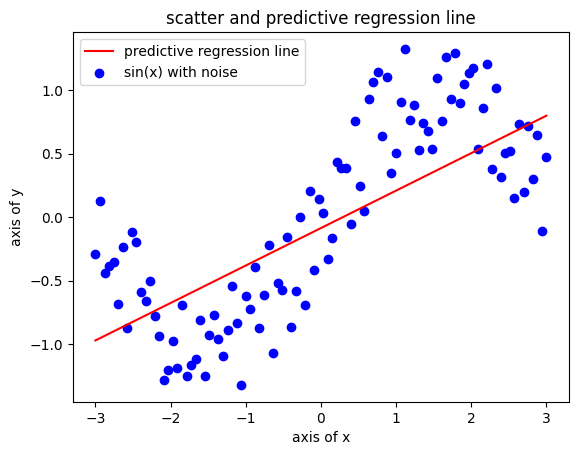

In [4]:
y_hat = []
for x in train_x:
    x = torch.tensor(x).float().cuda()
    y_hat.append(model(x).detach().cpu().item())

plt.plot(train_x,y_hat,label="predictive regression line",color='red')
plt.xlabel("axis of x")
plt.ylabel("axis of y")
plt.title("scatter and predictive regression line")
plt.scatter(train_x,train_y,label="sin(x) with noise",color='blue')
plt.legend()
plt.show()

2、线性回归（使用多项式函数对原始数据进行变换）

(1) 生成训练数据，数据同上

In [5]:
num_observations=100
train_x2=np.linspace(-3,3,num_observations)
train_y2=np.sin(train_x)+np.random.uniform(-0.5,0.5,num_observations)

(2)使用pytorch实现线性回归模型，这里我们假设𝑦是𝑥的 3 次多项式，那么
我们可以将数据扩展为：𝑥、𝑥^2、𝑥^3三维数据，此时模型变为：
𝑦 = 𝑤1 ∗ 𝑥 + 𝑤2 ∗ 𝑥^2 + 𝑤3 ∗ 𝑥^3 + 𝑏

在这一步先自定义非线性回归模型，重写前向传播函数，然后进行初始化模型，定义损失函数，选择优化器（如何反向传播）。

In [6]:
#定义一个模型
class PolynomialLinearModel(nn.Module):
    def __init__(self):
        super(PolynomialLinearModel,self).__init__()
        self.fc1=nn.Linear(4,1)
    
    def forward(self,x):
        #扩展输入，输入的矩阵是（M，N）M是样本数量，N是特征数量。
        x_expanded=torch.cat([x,x**2,x**3,torch.ones_like(x)],dim=1)
        output=self.fc1(x_expanded)
        return output
    
# 初始化模型、损失函数和优化器
model_Poly = PolynomialLinearModel().cuda()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6)

(3) 训练模型并输出参数𝑤1、𝑤2、𝑤3、𝑏和损失。（提交运行结果）

主要步骤如下：
1.定义超参数
2.将数据从CPU转到GPU
3.进行迭代
4.打印相关参数

In [25]:
num_epochs=500
num_observations=100
# 使数据形式符合输入形式
train_x2 = train_x2.reshape(num_observations, 1)
x_train_tensor = torch.tensor(train_x2).float().cuda()  # 移动到 GPU
train_y2 = train_y2.reshape(num_observations, 1)
y_train_tensor = torch.tensor(train_y2).float().cuda()  # 移动到 GPU

for epoch in range(num_epochs):
    model_Poly.train()
    optimizer.zero_grad()
    output = model_Poly(x_train_tensor)  # 确保 x_train_tensor 已经在 GPU 上
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    # 获取权重和偏置
    w1, w2, w3, b = model_Poly.fc1.weight[0, 0].item(), model_Poly.fc1.weight[0, 1].item(), model_Poly.fc1.weight[0, 2].item(), model_Poly.fc1.weight[0, 3].item()
    if epoch%10==0:
        print(f'epoch:{epoch+1} 参数: w1 = {w1}, w2 = {w2}, w3 = {w3}, b = {b}, loss={loss.item()}')

epoch:1 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:11 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:21 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:31 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:41 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:51 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:61 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:71 参数: w1 = 0.32896900177001953, w2 = 0.4309638738632202, w3 = 0.2151673436164856, b = 0.44015467166900635, loss=-0.0
epoch:81 

(4) 画出预测回归曲线以及训练数据散点图，对比回归曲线和散点图并分析原因。

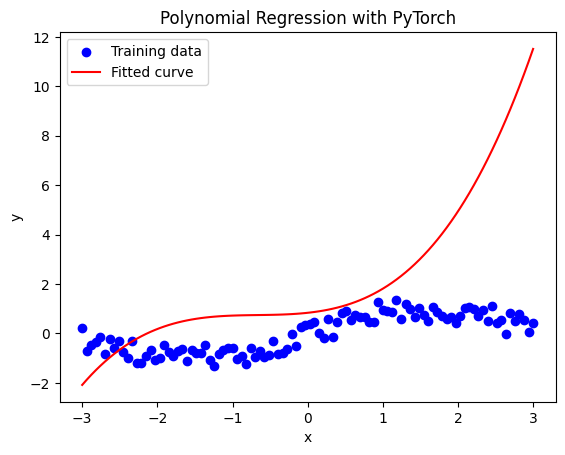

In [26]:
model_Poly.eval()
with torch.no_grad():#关闭梯度计算,避免这种追踪，从而节省内存
    y_pred = model_Poly(x_train_tensor).cpu().numpy()

# 绘制预测回归曲线和训练数据散点图
plt.scatter(train_x2,train_y2, label='Training data', color='blue')
plt.plot(train_x2, y_pred, label='Fitted curve', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with PyTorch')
plt.show()

观察和分析：
1.三次函数不能很好地拟合散点：分析后得出多项式的自由度有限，对于复杂且周期性的正弦函数数据，多项式的表达能力并不足以捕捉全部特征。
2.模型可能会有过拟合现象。多项式回归容易对噪声和局部小波动产生较高的敏感度。
3.可以用更高次的函数去拟合，三次函数无法很好地拟合。

3、Softmax 分类

(1) 获取 MNIST 数据集，每张图片像素为28 × 28

先下载好数据集到本地，分为训练数据集合测试数据集。

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. 加载 MNIST 数据集
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(2) 模型架构为：𝑦 = 𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑤 ∗ 𝑥 + 𝑏),其中𝑤的维度为784 × 10，𝑏的维度为10。

主要编码流程为：
1.定义 Softmax 分类模型。
2.初始化模型、损失函数（交叉熵）和优化器（SGD）。
3.实现训练循环，包括前向传播、损失计算、反向传播和参数更新。
4.在每个 epoch 后进行模型评估，并在训练和测试集上验证模型性能。

In [10]:
# 2. 定义 Softmax 分类模型
class SoftmaxClassifier(nn.Module):
    def __init__(self):
        super(SoftmaxClassifier, self).__init__()
        self.fc = nn.Linear(28*28, 10)  # w: [784, 10], b: [10]

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        output = self.fc(x)
        return nn.functional.softmax(output, dim=1)  # Apply softmax to output

# 初始化模型、损失函数和优化器
model = SoftmaxClassifier().cuda()
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss combines softmax + NLLLoss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 训练模型
num_epochs = 50
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

def compute_accuracy(output, target):
    _, pred = torch.max(output, 1)
    correct = (pred == target).sum().item()
    return correct / target.size(0)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_train_accuracy = 0
    
    # Training loop
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_accuracy += compute_accuracy(output, labels)
    
    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # 在测试集上验证
    model.eval()
    total_test_loss = 0
    total_test_accuracy = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            output = model(images)
            loss = criterion(output, labels)
            total_test_loss += loss.item()
            total_test_accuracy += compute_accuracy(output, labels)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = total_test_accuracy / len(test_loader)
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_accuracy:.4f}, Test Loss: {avg_test_loss:.4f}, Test Acc: {avg_test_accuracy:.4f}')

Epoch [1/50], Train Loss: 1.7345, Train Acc: 0.7630, Test Loss: 1.6454, Test Acc: 0.8372
Epoch [2/50], Train Loss: 1.6458, Train Acc: 0.8324, Test Loss: 1.6312, Test Acc: 0.8436
Epoch [3/50], Train Loss: 1.6358, Train Acc: 0.8379, Test Loss: 1.6263, Test Acc: 0.8461
Epoch [4/50], Train Loss: 1.6030, Train Acc: 0.8755, Test Loss: 1.5689, Test Acc: 0.9102
Epoch [5/50], Train Loss: 1.5693, Train Acc: 0.9087, Test Loss: 1.5616, Test Acc: 0.9155
Epoch [6/50], Train Loss: 1.5633, Train Acc: 0.9127, Test Loss: 1.5576, Test Acc: 0.9176
Epoch [7/50], Train Loss: 1.5594, Train Acc: 0.9160, Test Loss: 1.5528, Test Acc: 0.9212
Epoch [8/50], Train Loss: 1.5568, Train Acc: 0.9168, Test Loss: 1.5530, Test Acc: 0.9189
Epoch [9/50], Train Loss: 1.5546, Train Acc: 0.9187, Test Loss: 1.5507, Test Acc: 0.9213
Epoch [10/50], Train Loss: 1.5528, Train Acc: 0.9196, Test Loss: 1.5513, Test Acc: 0.9200
Epoch [11/50], Train Loss: 1.5513, Train Acc: 0.9208, Test Loss: 1.5489, Test Acc: 0.9218
Epoch [12/50], Trai

(3) 画出训练和测试过程的准确率随迭代次数变化图，画出训练和测试过程的损
失随迭代次数变化图。（提交最终分类精度、分类损失以及两张变化图）

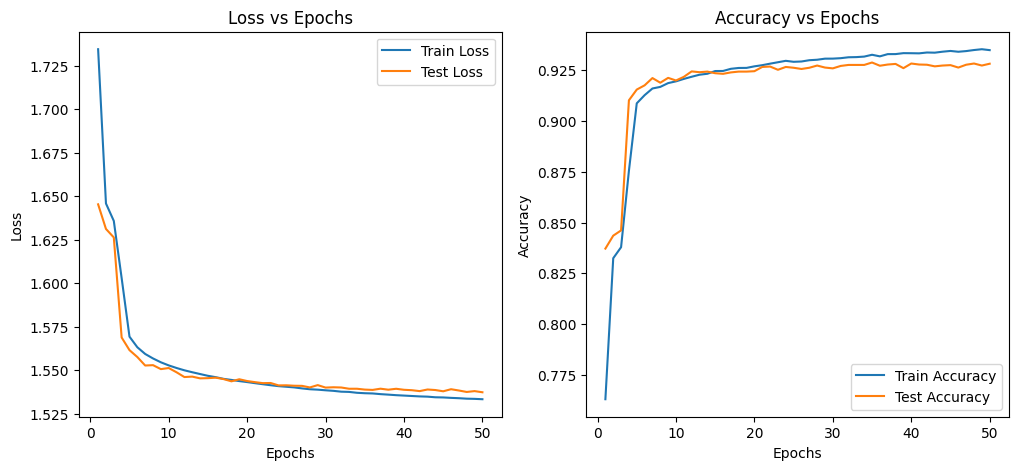

In [11]:
import matplotlib.pyplot as plt

# 5. 绘制损失和准确率变化图
epochs = range(1, num_epochs + 1)

# 绘制损失图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# 绘制准确率图
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.show()
